# Tabular Playground Series - Jul 2022
- Practice your ML skills on this approachable dataset!
- https://www.kaggle.com/competitions/tabular-playground-series-jul-2022
- Unsupervised Clustering

# 0. 패키지

In [1]:
import time
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture

# 1. 데이터셋

In [3]:
origin_df = pd.read_csv('./data.csv').set_index('id')
origin_df

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466


In [4]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

In [5]:
origin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


## 1.1 정제

In [6]:
scaler = RobustScaler()
scaler.fit(origin_df)

cols = origin_df.columns
df = scaler.transform(origin_df)
df = pd.DataFrame(df, columns=cols)

df

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.289422,-0.681709,0.480993,0.440438,-0.608419,0.543306,1.676349,-0.6,1.4,1.000000,...,-0.353703,-0.557990,-0.565412,-0.529246,0.691952,-0.495728,0.584470,0.758663,0.825922,0.533586
1,-0.511108,-0.341509,0.484862,0.742530,-1.212936,0.639854,-0.065699,-0.6,-0.6,-0.142857,...,-0.316972,-0.065748,-1.320256,-0.400787,0.344902,0.750813,-0.083245,-0.429556,0.287253,-1.184987
2,0.596716,0.235716,-0.866959,-0.462063,0.079962,0.580627,1.475939,0.0,1.0,-0.285714,...,-0.305678,-1.181785,0.880282,1.701789,0.066428,-1.101325,-0.413752,0.773337,-0.713536,-1.652338
3,-0.371865,0.164895,0.195896,0.174549,0.307565,-0.906470,0.104486,0.2,-0.8,0.857143,...,0.458849,0.950851,0.393496,0.559780,-0.926260,0.600437,-0.850858,-0.307835,-0.079478,0.250674
4,-0.497813,-0.775679,-0.199894,-1.358790,-0.210868,-1.374829,0.581336,0.6,0.2,-0.285714,...,-1.205283,-0.320349,0.237929,0.174599,-1.127764,0.616204,-0.446679,0.920087,-0.291599,-0.843995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.174173,1.223656,-0.510390,0.235673,-0.217434,0.243335,1.193467,0.0,0.2,0.142857,...,-0.214320,-0.189885,-0.720739,0.730213,0.310027,0.936126,-0.051838,-0.772202,0.129333,0.352344
97996,0.237097,0.521794,0.417041,-0.980583,-0.260570,0.134232,0.133932,-0.4,0.6,-0.714286,...,0.087551,1.024966,0.252643,0.889460,-0.325914,0.194308,0.596184,0.113171,0.545782,0.491343
97997,-0.185868,-0.345655,1.397507,-0.994414,0.145825,-0.415707,-0.280092,0.6,0.6,0.428571,...,-0.628930,-1.318494,-0.938541,-0.743242,1.099992,0.630215,0.138988,1.216975,0.935409,0.448957
97998,0.228751,1.615286,0.564272,0.327157,0.344294,0.045459,-0.246173,-0.8,0.4,0.571429,...,-0.007589,0.826225,1.157481,0.212566,0.389584,0.498565,-0.207298,-0.846726,-0.417789,0.100883


# 2. EDA
  - 연속적 데이터 : f_00 ~ f_06, f_14 ~ f_28
  - 불연속적 데이터 : f_07 ~ f_13

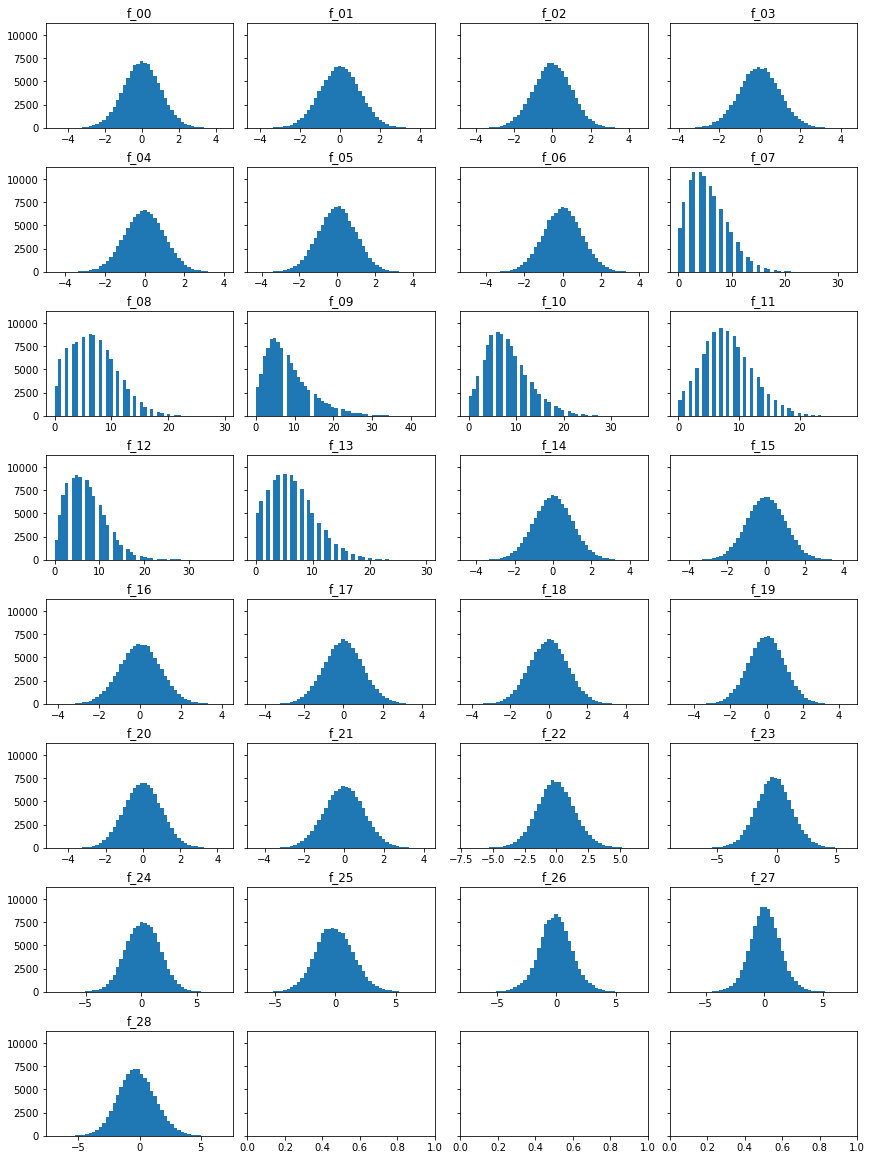

In [7]:
fig, axes = plt.subplots(8, 4, figsize=(12, 16), sharey='all', constrained_layout=True)

for i, col in enumerate(cols) :
    ax = axes[i // 4, i % 4]
    origin_df[col].hist(bins=50, ax=ax)
    ax.set_title(col)
    ax.grid(False)

plt.show()

# 3. 모델

## 3.1 최적 군집 개수
  - Elbow Method
  - K=7 지점에서 이전과 이후의 변화량이 가장 크게 달라짐


In [8]:
inertias = []
deltas = []
times = []

prev = 0
for i in tqdm(range(2, 21)) :
    model = KMeans(i)
    start_time = time.time()
    model.fit(df)
    t = time.time() - start_time

    inertias.append(model.inertia_)
    deltas.append(abs(prev - model.inertia_))
    times.append(t)

    prev = model.inertia_

 63%|██████▎   | 12/19 [01:46<01:02,  8.91s/it]


KeyboardInterrupt: 

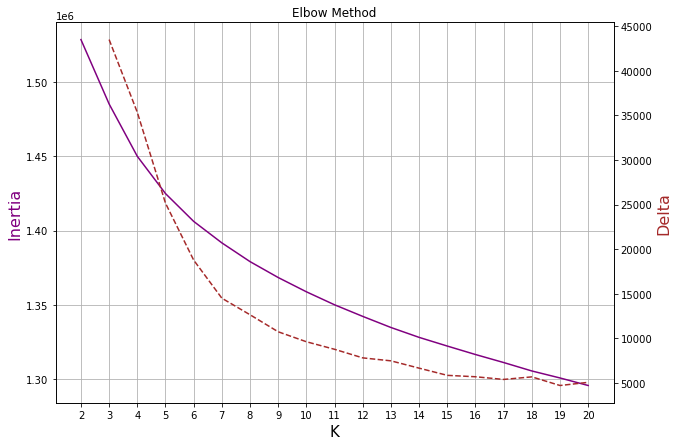

In [ ]:
elbow_df = pd.DataFrame({'Inertia':inertias, 'Delta':deltas, 'Time':times}, index=range(2, 21))

fig, ax = plt.subplots(figsize=(10 ,7))

d1 = 'Inertia'
ax.plot(elbow_df[d1], c='purple')
ax.set_ylabel(d1, c='purple', fontsize=16)

d2 = 'Delta'
ax2 = ax.twinx()
ax2.plot(elbow_df[d2].loc[3:], c='brown', ls='dashed')
ax2.set_ylabel(d2, c='brown', fontsize=16)

ax.set_xlabel('K', fontsize=15)
ax.set_xticks(elbow_df.index)
ax.grid(True)

ax.set_title('Elbow Method')
plt.show()

## 3.2 K-Means Clustering

In [16]:
km = KMeans(7, max_iter=500)
preds = km.fit_predict(df)

## 3.3 Bayesian Gaussian Mixture

In [9]:
bgm = BayesianGaussianMixture(n_components=7, n_init=1, max_iter=300, verbose=1, verbose_interval=10)
preds = bgm.fit_predict(df)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
Initialization converged: True


In [25]:
votes = []

votes.append(km.predict(df))
votes.append(bgm.predict(df))

vote_df = pd.DataFrame({'kmeans':votes[0], 'bgm':votes[1]})

In [29]:
vote_df.reset_index().groupby('kmeans')['index'].count()

kmeans
0    12414
1    14680
2    14479
3    12521
4    14381
5    13192
6    16333
Name: index, dtype: int64

In [30]:
vote_df.reset_index().groupby('bgm')['index'].count()

bgm
0    17390
1    13137
2    13924
3    18600
4    11115
5    12957
6    10877
Name: index, dtype: int64

In [104]:
tmp = vote_df[vote_df['kmeans'] == i]
tmp

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.289422,-0.681709,0.480993,0.440438,-0.608419,0.543306,1.676349,-0.6,1.4,1.000000,...,-0.353703,-0.557990,-0.565412,-0.529246,0.691952,-0.495728,0.584470,0.758663,0.825922,0.533586
1,-0.511108,-0.341509,0.484862,0.742530,-1.212936,0.639854,-0.065699,-0.6,-0.6,-0.142857,...,-0.316972,-0.065748,-1.320256,-0.400787,0.344902,0.750813,-0.083245,-0.429556,0.287253,-1.184987
2,0.596716,0.235716,-0.866959,-0.462063,0.079962,0.580627,1.475939,0.0,1.0,-0.285714,...,-0.305678,-1.181785,0.880282,1.701789,0.066428,-1.101325,-0.413752,0.773337,-0.713536,-1.652338
3,-0.371865,0.164895,0.195896,0.174549,0.307565,-0.906470,0.104486,0.2,-0.8,0.857143,...,0.458849,0.950851,0.393496,0.559780,-0.926260,0.600437,-0.850858,-0.307835,-0.079478,0.250674
4,-0.497813,-0.775679,-0.199894,-1.358790,-0.210868,-1.374829,0.581336,0.6,0.2,-0.285714,...,-1.205283,-0.320349,0.237929,0.174599,-1.127764,0.616204,-0.446679,0.920087,-0.291599,-0.843995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.174173,1.223656,-0.510390,0.235673,-0.217434,0.243335,1.193467,0.0,0.2,0.142857,...,-0.214320,-0.189885,-0.720739,0.730213,0.310027,0.936126,-0.051838,-0.772202,0.129333,0.352344
97996,0.237097,0.521794,0.417041,-0.980583,-0.260570,0.134232,0.133932,-0.4,0.6,-0.714286,...,0.087551,1.024966,0.252643,0.889460,-0.325914,0.194308,0.596184,0.113171,0.545782,0.491343
97997,-0.185868,-0.345655,1.397507,-0.994414,0.145825,-0.415707,-0.280092,0.6,0.6,0.428571,...,-0.628930,-1.318494,-0.938541,-0.743242,1.099992,0.630215,0.138988,1.216975,0.935409,0.448957
97998,0.228751,1.615286,0.564272,0.327157,0.344294,0.045459,-0.246173,-0.8,0.4,0.571429,...,-0.007589,0.826225,1.157481,0.212566,0.389584,0.498565,-0.207298,-0.846726,-0.417789,0.100883


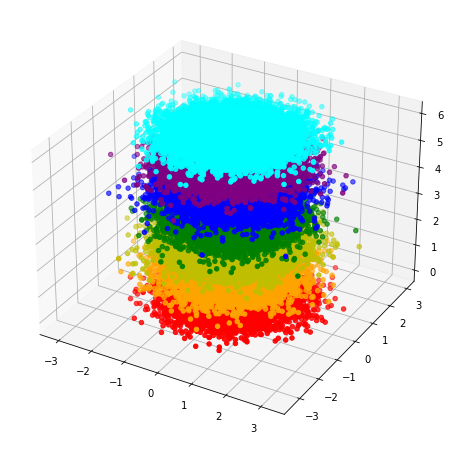

In [106]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

for i, c in enumerate(['r', 'orange', 'y', 'g', 'b', 'purple', 'cyan']) :
    tmp = vote_df[vote_df['kmeans'] == i].index
    ax.scatter(df['f_01'][tmp], df['f_04'][tmp], vote_df['kmeans'][tmp], color=c)

plt.show()

# 4. Submission

In [17]:
pred_df = pd.DataFrame(preds, columns=['Predicted'])
pred_df.index.name = 'Id'

pred_df

,Predicted
Id,
0,0
1,6
2,5
3,3
4,6
...,...
97995,6
97996,6
97997,4


In [13]:
pred_df.to_csv('submission.csv')